Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64
Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


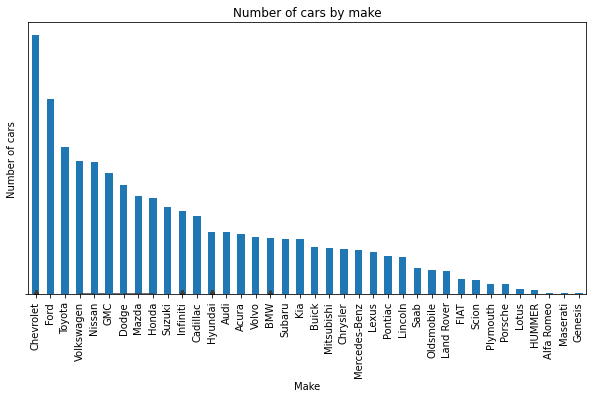

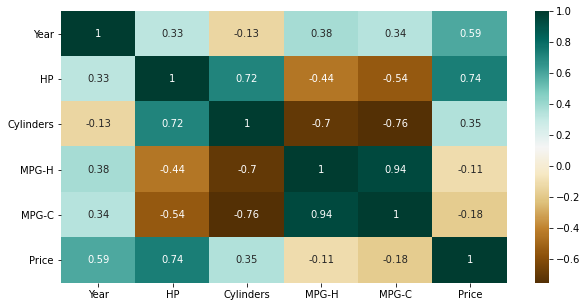

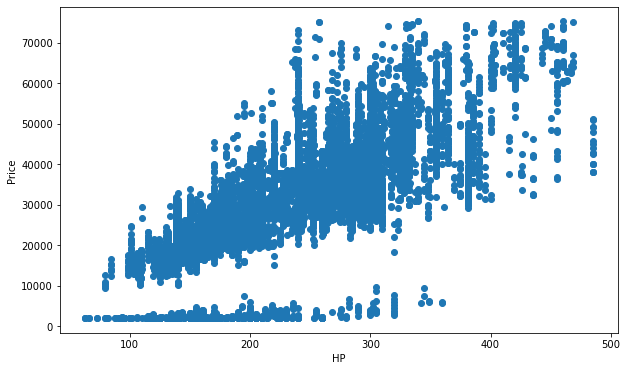

In [62]:
# Könyvtárak importálása
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# CSV fájl beolvasása
df = pd.read_csv("data.csv")

# Alap lekérdezések
#print(df.shape)
#print(df.head(5))
#print(df.tail(5))
#df.count()

# Az adattípusok ellenőrzése
#df.dtypes

# A nem szükséges oszlopok törlése
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

# Oszlopnevek változtatása
df = df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })

# A duplikált sorok kiválasztása, törlése
duplicate_rows_df = df[df.duplicated()]
#print("number of duplicate rows: ", duplicate_rows_df.shape)
print(df.count())      # Used to count the number of rows
df = df.drop_duplicates()

# A hiányzó értéket tartalmazó sor kiválasztása, törlése
print(df.isnull().sum())
df = df.dropna()    # Dropping the missing values.
print(df.isnull().sum())

# Egy oszlop boxplot kirajzolása
#print(sns.boxplot(x=df['Price']))
#sns.boxplot(x=df['HP'])
sns.boxplot(x=df['Cylinders'])

# A kirívó értékek törlése
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

# Növekvő sorrendű histrogam
ax = df.Make.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
#ax = df.plot.hist()
ax.invert_yaxis()
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

# Hőtérkép készítése
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Két oszlopból diagram
fig, az = plt.subplots(figsize=(10,6))
az.scatter(df['HP'], df['Price'])
az.set_xlabel('HP')
az.set_ylabel('Price')
plt.show()
